# **FILM REVENUE PREDICTOR**

## Objectives

* Answer business requirement 1:
    * The client is interested in understanding the correlation between a film's revenue and the elements that are known prior to the greenlight decision

## Inputs

* jupyter_notebooks/outputs/datasets/collection/merged_movie_data.csv
* jupyter_notebooks/outputs/cleaned/df_final_cleaned.pkl

## Outputs

* Generate code that answers business requirement 1 and can be used to build the Streamlit App




---

# Change working directory

Change the working directory 


In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Film_Hit_prediction/jupyter_notebooks'

New directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/Film_Hit_prediction'

---

# Load Data


### Import Original Data

* With all movie data variables

In [4]:
import pandas as pd

df_movies = pd.read_csv('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/datasets/collection/merged_movie_data.csv')

print(df_movies.head().to_string(index=False))

   budget                                                                                                                                 genres                                     homepage     id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    keywords original_language                      

### Import Cleaned, filtered and encoded 
* With relevant variables for a movie prior to greenlight.

In [5]:
df_new = pd.read_pickle('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/cleaned/df_final_cleaned.pkl')

print(df_new.head().to_string(index=False))

   budget    revenue  runtime  language_encoded  popularity  Action  Adventure  Animation  Comedy  Crime  Documentary  Drama  Family  Fantasy  History  Horror  Music  Mystery  Romance  Science Fiction  TV Movie  Thriller  War  Western  crew_Director_Aaron Seltzer  crew_Director_Adam McKay  crew_Director_Adam Shankman  crew_Director_Alejandro González Iñárritu  crew_Director_Alex Proyas  crew_Director_Alexander Payne  crew_Director_Alfonso Cuarón  crew_Director_Alfred Hitchcock  crew_Director_Andrew Adamson  crew_Director_Andrew Niccol  crew_Director_Andrzej Bartkowiak  crew_Director_Andy Fickman  crew_Director_Andy Tennant  crew_Director_Ang Lee  crew_Director_Anne Fletcher  crew_Director_Antoine Fuqua  crew_Director_Atom Egoyan  crew_Director_Barry Levinson  crew_Director_Barry Sonnenfeld  crew_Director_Ben Stiller  crew_Director_Bill Condon  crew_Director_Bobby Farrelly  crew_Director_Brad Anderson  crew_Director_Brad Bird  crew_Director_Brett Ratner  crew_Director_Brian De Palma  cr

---

# Data Exploration

Install Ydata profiling

In [6]:
%pip install ydata-profiling


Note: you may need to restart the kernel to use updated packages.


# Correlation Study

Correlation high versus low revenue movies 


Number of high revenue movies: 1201
Number of low revenue movies: 1425
Percentage of high revenue movies: 25.02%
Percentage of low revenue movies: 29.68%


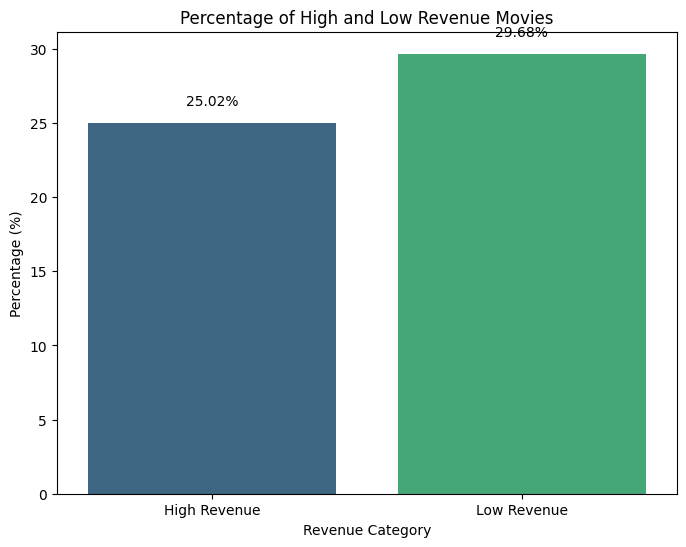

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (make sure to adjust the path if needed)
df_movies = pd.read_pickle('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/cleaned/df_final_cleaned.pkl')

# High revenue movies (top 25%)
high_revenue = df_movies[df_movies['revenue'] >= df_movies['revenue'].quantile(0.75)]

# Low revenue movies (bottom 25%)
low_revenue = df_movies[df_movies['revenue'] <= df_movies['revenue'].quantile(0.25)]

# Calculate the percentages
total_movies = len(df_movies)
percent_high_revenue = (len(high_revenue) / total_movies) * 100
percent_low_revenue = (len(low_revenue) / total_movies) * 100

# Print the counts and percentages
print("\nNumber of high revenue movies:", len(high_revenue))
print("Number of low revenue movies:", len(low_revenue))
print(f"Percentage of high revenue movies: {percent_high_revenue:.2f}%")
print(f"Percentage of low revenue movies: {percent_low_revenue:.2f}%")

# Create a bar plot to compare the percentages
plt.figure(figsize=(8,6))
sns.barplot(x=['High Revenue', 'Low Revenue'], y=[percent_high_revenue, percent_low_revenue], palette='viridis')

# Add titles and labels
plt.title('Percentage of High and Low Revenue Movies')
plt.ylabel('Percentage (%)')  # Corrected line
plt.xlabel('Revenue Category')

# Add percentage labels on the bars
for i, v in enumerate([percent_high_revenue, percent_low_revenue]):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom')

# Save the plot
plt.savefig('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/figures/Percentage_Movies_making_a_profit_plot.png', dpi=300, bbox_inches='tight')


# Show the plot
plt.show()

 Calculate the Correlation Matrix on full movie data
 * On the data including the variables only available AFTER the film is produced

In [13]:
output_dir = '/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/figures'
os.makedirs(output_dir, exist_ok=True)

corr_matrix = df_movies.corr()
print("\nCorrelations with revenue:\n")
print(corr_matrix['revenue'].sort_values(ascending=False))

# Save to CSV
corr_with_revenue = corr_matrix['revenue'].sort_values(ascending=False)
corr_with_revenue.to_csv(os.path.join(output_dir, 'correlations_with_revenue_postproduction.csv'), index=True)

print("Correlations saved to correlations_with_revenue.csv")


Correlations with revenue:

revenue           1.000000
budget            0.730789
popularity        0.644678
Adventure         0.344339
cast_Stan Lee     0.258961
                    ...   
country_France   -0.057374
Romance          -0.065475
Documentary      -0.067723
Horror           -0.082833
Drama            -0.177474
Name: revenue, Length: 1131, dtype: float64
Correlations saved to correlations_with_revenue.csv


Calculate the correlation matrix on data accessible before greenlight
* On the new data with the variables accessible BEFORE to greenlight


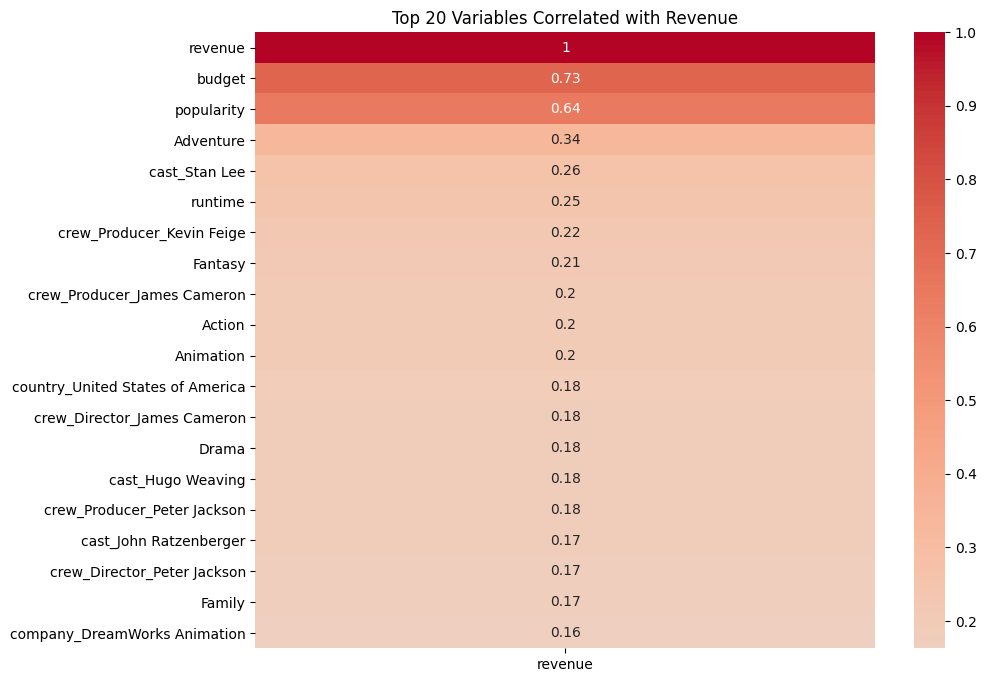

In [ ]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df_new = pd.read_pickle('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/cleaned/df_final_cleaned.pkl')

# Compute correlation matrix
correlation_matrix = df_new.corr()

# Get top 20 variables most correlated with revenue
top_20_corr = correlation_matrix[['revenue']].abs().sort_values(by='revenue', ascending=False).head(20)

# Plot heatmap of top 20 correlations with revenue
plt.figure(figsize=(10, 8))
sns.heatmap(top_20_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Top 20 Variables Correlated with Revenue')

# Ensure output directory exists
os.makedirs('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/figures', exist_ok=True)

plt.savefig('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/figures/before_greenlight_correlations_study.png', bbox_inches='tight')

plt.show()

Correlation budget revenue

In [2]:
# Convert budget and revenue to millions 
df_millions = df_new.copy() 

df_millions['budget_millions'] = df_millions['budget'] / 1_000_000  
df_millions['revenue_millions'] = df_millions['revenue'] / 1_000_000 


# Then create the plot
plt.figure(figsize=(10, 6))
sns.regplot(data=df_millions, x='budget_millions', y='revenue_millions',
           scatter=True, lowess=True,
           line_kws={'color': 'red', 'label': 'Trend Line'})
plt.axhline(y=df_millions['revenue_millions'].mean(),
           color='green', linestyle='--', label='Avg Revenue')
plt.title('Budget vs Revenue (in Millions $)')
plt.xlabel('Budget (Millions $)')
plt.ylabel('Revenue (Millions $)')
plt.legend()
# Ensure output directory exists
os.makedirs('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/figures', exist_ok=True)

# Save the plot to a file
plt.savefig('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/figures/budget_vs_revenue.png', bbox_inches='tight')

plt.show()


NameError: name 'df_new' is not defined

Correlation genres revenue

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_new = pd.read_pickle('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/cleaned/df_final_cleaned.pkl')

genre_columns = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 
                'Documentary', 'Drama', 'Family', 'Fantasy', 'Horror', 
                'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 
                'Thriller', 'War', 'Western']

plt.figure(figsize=(12, 6))
genre_correlations = df_new[genre_columns + ['revenue']].corr()['revenue'][:-1]
sns.barplot(x=genre_correlations.values, y=genre_correlations.index)
plt.title('Genre Correlations with Revenue')
plt.xlabel('Correlation Coefficient')

# Save the plot to a file
plt.savefig('outputs/figures/Genre_correlation_ with_ Revenue_plot.png', 
            dpi=300, 
            bbox_inches='tight')

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate mean revenue for each individual genre
genre_means = {
   genre: df_new[df_new[genre] == 1]['revenue'].mean()
   for genre in ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 
                'Documentary', 'Drama', 'Family', 'Fantasy', 'Horror', 
                'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 
                'Thriller', 'War', 'Western']
}

# Convert to Series and sort
genre_revenue = pd.Series(genre_means).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_revenue.values, y=genre_revenue.index)
plt.title('Average Revenue by Genre')
plt.xlabel('Average Revenue ($)')
plt.ylabel('Genre')

plt.savefig('outputs/figures/Average_Revenue_by_Genre_plot.png', 
            dpi=300, 
            bbox_inches='tight')

plt.show()


Correlation language revenue

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
df_movies['original_language'] = df_movies['original_language'].fillna('unknown')
lang_revenue = df_movies.groupby('original_language')['revenue'].mean() / 1000000
sns.barplot(x=lang_revenue.index, y=lang_revenue.values)
plt.title('Average Revenue by Language')
plt.xlabel('Language')
plt.ylabel('Average Revenue (Millions $)')
plt.xticks(rotation=45)

plt.savefig('outputs/figures/Average_Revenue_by_Language.png', 
            dpi=300, 
            bbox_inches='tight')

plt.show()


EDA on selected variables

In [ ]:
# For budget and revenue distributions:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_movies['budget'])
plt.title('Budget Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df_movies['revenue'])
plt.title('Revenue Distribution')
plt.tight_layout()

plt.show()


Genre combination analysis

In [ ]:
plt.figure(figsize=(12, 6))
genre_totals = df_new[['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 
                        'Documentary', 'Drama', 'Family', 'Fantasy', 'Horror',
                        'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie',
                        'Thriller', 'War', 'Western']].sum().sort_values(ascending=False)

plt.barh(genre_totals.index, genre_totals.values)
plt.title('Number of Movies per Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')

plt.savefig('outputs/figures/Number_of_movies_produced_by_genre.png', 
            dpi=300, 
            bbox_inches='tight')

plt.show()


Revenue outliers analysis

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(y=df_millions['revenue_millions'])
plt.title('Revenue Outliers')

Correlation runtime revenue

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace with your dataset if needed)
df_new = pd.read_pickle('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/cleaned/df_final_cleaned.pkl')

# Ensure that the dataset has 'runtime' and 'revenue' columns
if 'runtime' in df_new.columns and 'revenue' in df_new.columns:
    
    # Create a regression plot to visualize the relationship between runtime and revenue
    plt.figure(figsize=(10, 6))
    sns.regplot(data=df_new, x='runtime', y='revenue', scatter_kws={'s': 10}, line_kws={'color': 'red'})
    
    plt.title('Regression Plot: Runtime vs Revenue')
    plt.xlabel('Runtime (minutes)')
    plt.ylabel('Revenue ($)')

    # Save the plot as a PNG file in the specified 'figures' directory
    plt.savefig('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/figures/runtime_vs_revenue_plot.png', bbox_inches='tight')
    
    plt.show()

else:
    print("Columns 'runtime' and/or 'revenue' are missing from the dataset.")


Directors versus revenue

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_new = pd.read_pickle('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/cleaned/df_final_cleaned.pkl')

# Ensure that the dataset has 'revenue' column
if 'revenue' in df_new.columns:
    
    # Dynamically select all columns related to crew_director (assuming they are one-hot encoded)
    director_columns = [col for col in df_new.columns if 'crew_Director' in col]

    # Calculate the correlation between the crew_director columns and 'revenue'
    director_correlations = df_new[director_columns + ['revenue']].corr()['revenue'][:-1]  # Exclude 'revenue' itself

    # Sort correlations and get the top 20 directors
    top_20_directors = director_correlations.sort_values(ascending=False).head(20)

    # Display the top 20 directors
    print(top_20_directors)

    # Create a bar plot to visualize the correlations
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_20_directors.values, y=top_20_directors.index)
    plt.title('Top 20 Directors Most Related to Revenue')
    plt.xlabel('Correlation with Revenue')
    plt.ylabel('Directors')

    # Save the plot as a PNG file in the specified 'figures' directory
    plt.savefig('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/figures/top_20_directors_vs_revenue.png', bbox_inches='tight')

    # Show the plot
    plt.show()

else:
    print("Column 'revenue' is missing from the dataset.")


Correlation cast to popularity

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_new = pd.read_pickle('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/cleaned/df_final_cleaned.pkl')

# Dynamically select all columns related to 'cast_' (cast members)
cast_columns = [col for col in df_new.columns if col.startswith('cast_')]

# Calculate the popularity score by counting the number of movies each cast member appears in (sum of '1's in the one-hot encoding)
cast_popularity = df_new[cast_columns].sum()

# Sort the cast members by their popularity score (in descending order)
top_20_cast_by_popularity = cast_popularity.sort_values(ascending=False).head(20)

# Display the top 20 cast members by popularity
print(top_20_cast_by_popularity)

# Create a bar plot to visualize the popularity of the top 20 cast members
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_cast_by_popularity.values, y=top_20_cast_by_popularity.index)
plt.title('Top 20 Cast Members by Popularity')
plt.xlabel('Number of Movies')
plt.ylabel('Cast Members')

# Save the plot as a PNG file in the specified 'figures' directory
plt.savefig('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/figures/top_20_cast_by_popularity.png', bbox_inches='tight')

# Show the plot
plt.show()


Cast to revenue

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_new = pd.read_pickle('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/cleaned/df_final_cleaned.pkl')

# Dynamically select all columns related to 'cast_' (cast members)
cast_columns = [col for col in df_new.columns if col.startswith('cast_')]

# Calculate the correlation between each cast member (individual cast columns) and 'revenue'
cast_revenue_correlations = df_new[cast_columns + ['revenue']].corr()['revenue'][:-1]  # Exclude 'revenue' itself

# Sort the correlations in descending order and take the top 20
top_20_cast_revenue = cast_revenue_correlations.sort_values(ascending=False).head(20)

# Create a bar plot to visualize the top 20 cast members most correlated with revenue
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_cast_revenue.values, y=top_20_cast_revenue.index)
plt.title('Top 20 Cast Members Most Correlated with Revenue')
plt.xlabel('Correlation with Revenue')
plt.ylabel('Cast Members')

# Save the plot as a PNG file in the specified 'figures' directory
plt.savefig('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/figures/cast_vs_revenue.png', bbox_inches='tight')

# Show the plot
plt.show()


Writer to revenue

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_new = pd.read_pickle('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/cleaned/df_final_cleaned.pkl')

# Ensure that the dataset has 'revenue' column
if 'revenue' in df_new.columns:
    
    # Dynamically select all columns related to 'crew_Writer_' (writer columns)
    writer_columns = [col for col in df_new.columns if col.startswith('crew_Writer')]

    # Calculate the correlation between each writer column and 'revenue'
    writer_revenue_correlations = df_new[writer_columns + ['revenue']].corr()['revenue'][:-1]  # Exclude 'revenue' itself
    
    # Sort the correlations in descending order
    writer_revenue_sorted = writer_revenue_correlations.sort_values(ascending=False)
    
    # Display the top correlated writers
    print(writer_revenue_sorted.head(20))  # Top 20 writers with highest correlation to revenue

    # Create a bar plot to visualize the correlation of each writer with revenue
    plt.figure(figsize=(12, 6))
    sns.barplot(x=writer_revenue_sorted.head(20).values, y=writer_revenue_sorted.head(20).index)
    plt.title('Top 20 Writers Most Correlated with Revenue')
    plt.xlabel('Correlation with Revenue')
    plt.ylabel('Writer')
    
    # Save the plot as a PNG file in the specified 'figures' directory
    plt.savefig('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/figures/writer_vs_revenue.png', bbox_inches='tight')

    # Show the plot
    plt.show()

else:
    print("Column 'revenue' or 'crew_Writer' is missing from the dataset.")


Correlation producers revenue

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_new = pd.read_pickle('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/cleaned/df_final_cleaned.pkl')

# Ensure that the dataset has 'revenue' column
if 'revenue' in df_new.columns:
    
    # Dynamically select all columns related to 'crew_Producer_' (producer columns)
    producer_columns = [col for col in df_new.columns if col.startswith('crew_Producer')]

    # Calculate the correlation between each producer column and 'revenue'
    producer_revenue_correlations = df_new[producer_columns + ['revenue']].corr()['revenue'][:-1]  # Exclude 'revenue' itself
    
    # Sort the correlations in descending order
    producer_revenue_sorted = producer_revenue_correlations.sort_values(ascending=False)
    
    # Display the top correlated producers
    print(producer_revenue_sorted.head(20))  # Top 20 producers with highest correlation to revenue

    # Create a bar plot to visualize the correlation of each producer with revenue
    plt.figure(figsize=(12, 6))
    sns.barplot(x=producer_revenue_sorted.head(20).values, y=producer_revenue_sorted.head(20).index)
    plt.title('Top 20 Producers Most Correlated with Revenue')
    plt.xlabel('Correlation with Revenue')
    plt.ylabel('Producer')
    
    # Save the plot as a PNG file in the specified 'figures' directory
    plt.savefig('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/figures/producer_vs_revenue.png', bbox_inches='tight')

    # Show the plot
    plt.show()

else:
    print("Column 'revenue' or 'crew_Producer' is missing from the dataset.")


Correlation production company revenue

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_new = pd.read_pickle('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/cleaned/df_final_cleaned.pkl')

# Ensure that the dataset has 'revenue' column
if 'revenue' in df_new.columns:
    
    # Dynamically select all columns related to 'company_' (company columns)
    company_columns = [col for col in df_new.columns if col.startswith('company_')]

    # Calculate the correlation between each company column and 'revenue'
    company_revenue_correlations = df_new[company_columns + ['revenue']].corr()['revenue'][:-1]  # Exclude 'revenue' itself
    
    # Sort the correlations in descending order
    company_revenue_sorted = company_revenue_correlations.sort_values(ascending=False)
    
    # Display the top correlated companies
    print(company_revenue_sorted.head(20))  # Top 20 companies with highest correlation to revenue

    # Create a bar plot to visualize the correlation of each company with revenue
    plt.figure(figsize=(12, 6))
    sns.barplot(x=company_revenue_sorted.head(20).values, y=company_revenue_sorted.head(20).index)
    plt.title('Top 20 Companies Most Correlated with Revenue')
    plt.xlabel('Correlation with Revenue')
    plt.ylabel('Company')
    
    # Save the plot as a PNG file in the specified 'figures' directory
    plt.savefig('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/figures/company_vs_revenue.png', bbox_inches='tight')

    # Show the plot
    plt.show()

else:
    print("Column 'revenue' or 'company' is missing from the dataset.")


Correlation production country revenue

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_new = pd.read_pickle('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/cleaned/df_final_cleaned.pkl')

# Ensure that the dataset has 'revenue' column
if 'revenue' in df_new.columns:
    
    # Dynamically select all columns related to 'country_'
    country_columns = [col for col in df_new.columns if col.startswith('country_')]

    # Calculate the correlation for each country column with 'revenue'
    country_revenue_corr = df_new[country_columns + ['revenue']].corr()['revenue'][:-1]

    # Create a DataFrame to store correlations
    correlation_df = pd.DataFrame({
        'Country': country_columns,
        'Correlation with Revenue': country_revenue_corr.values
    })

    # Sort the correlations by their absolute values (descending)
    correlation_df_sorted = correlation_df.sort_values(by='Correlation with Revenue', ascending=False)

    # Display the results
    print(correlation_df_sorted)

    # Create a bar plot to visualize the correlation of each country with revenue
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Correlation with Revenue', y='Country', data=correlation_df_sorted)
    plt.title('Correlation Between Production Countries and Revenue')
    plt.xlabel('Correlation with Revenue')
    plt.ylabel('Country')
    
    # Save the plot as a PNG file in the specified 'figures' directory
    plt.savefig('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/figures/country_vs_revenue_correlation.png', bbox_inches='tight')

    # Show the plot
    plt.show()

else:
    print("Column 'revenue' is missing from the dataset.")


Whis is most relevant between director, cast, writer , prducer to revenue

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_new = pd.read_pickle('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/cleaned/df_final_cleaned.pkl')

# Ensure that the dataset has 'revenue' column
if 'revenue' in df_new.columns:
    
    # Dynamically select all columns related to 'cast_', 'crew_director', 'crew_writer', 'crew_producer'
    cast_columns = [col for col in df_new.columns if col.startswith('cast_')]
    director_columns = [col for col in df_new.columns if col.startswith('crew_Director')]
    writer_columns = [col for col in df_new.columns if col.startswith('crew_Writer')]
    producer_columns = [col for col in df_new.columns if col.startswith('crew_Producer')]

    # Calculate the correlation for each group with 'revenue'
    cast_revenue_corr = df_new[cast_columns + ['revenue']].corr()['revenue'][:-1].mean()  # Mean correlation of cast
    director_revenue_corr = df_new[director_columns + ['revenue']].corr()['revenue'][:-1].mean()  # Mean correlation of directors
    writer_revenue_corr = df_new[writer_columns + ['revenue']].corr()['revenue'][:-1].mean()  # Mean correlation of writers
    producer_revenue_corr = df_new[producer_columns + ['revenue']].corr()['revenue'][:-1].mean()  # Mean correlation of producers

    # Create a DataFrame to compare correlation values
    correlation_comparison = pd.DataFrame({
        'Group': ['Cast', 'Director', 'Writer', 'Producer'],
        'Correlation with Revenue': [cast_revenue_corr, director_revenue_corr, writer_revenue_corr, producer_revenue_corr]
    })

    # Sort the groups by their correlation with revenue
    correlation_comparison_sorted = correlation_comparison.sort_values(by='Correlation with Revenue', ascending=False)

    # Display the results
    print(correlation_comparison_sorted)

    # Create a bar plot to visualize the correlation of each group with revenue
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Correlation with Revenue', y='Group', data=correlation_comparison_sorted)
    plt.title('Comparison of Correlation with Revenue for Cast, Director, Writer, and Producer')
    plt.xlabel('Correlation with Revenue')
    plt.ylabel('Group')
    
    # Save the plot as a PNG file in the specified 'figures' directory
    plt.savefig('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/figures/comparison_group_vs_revenue.png', bbox_inches='tight')

    # Show the plot
    plt.show()

else:
    print("Column 'revenue' is missing from the dataset.")


Correlation budget revenue

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_new = pd.read_pickle('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/cleaned/df_final_cleaned.pkl')

# Dynamically select all columns related to 'company_' (company columns)
company_columns = [col for col in df_new.columns if col.startswith('company_')]

# Calculate the correlation between each company column and 'revenue'
company_revenue_correlations = df_new[company_columns + ['revenue']].corr()['revenue'][:-1]  # Exclude 'revenue' itself

# Sort the correlations in descending order and take the top 20 companies
top_20_company_revenue = company_revenue_correlations.sort_values(ascending=False).head(20)

# Create a bar plot to visualize the top 20 companies most correlated with revenue
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_company_revenue.values, y=top_20_company_revenue.index)
plt.title('Top 20 Companies Most Correlated with Revenue')
plt.xlabel('Correlation with Revenue')
plt.ylabel('Companies')

# Save the plot as a PNG file in the specified 'figures' directory
plt.savefig('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/figures/company_vs_revenue.png', bbox_inches='tight')

# Show the plot
plt.show()


Percentage of profitable movies

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate percentages (assumes 'success_ratio' is already available in df_millions)
total = len(df_millions)
percent_profitable = (sum(df_millions['success_ratio'] > 1) / total) * 100
percent_not_profitable = 100 - percent_profitable

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=['Movies Making Profit', 'Movies Not Making Profit'], 
            y=[percent_profitable, percent_not_profitable])
plt.title('Percentage of Movies Making a Profit')
plt.ylabel('Percentage of Movies')

# Add percentage labels on the bars
for i, v in enumerate([percent_profitable, percent_not_profitable]):
    plt.text(i, v, f'{v:.1f}%', ha='center')

# Save the plot as a PNG file
plt.savefig('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/figures/Percentage_Movies_making_a_profit_plot.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


---

# Conclusions 

1. **The Variables Known Only AFTER a Film is Produced Are Key to Film Revenue**:
   After a film is produced, several variables become important in predicting revenue, such as **vote count popularity**, **vote average**, and audience engagement. Despite these factors being accessible post-production, they suggest that **films remain a risky investment**. Producers have limited control over these elements, making it harder to predict revenue with certainty.

2. **The Variables Knows Prior to Greenlight**:
   For data accessible to the producer **before** production, the most influential factors for predicting revenue include **budget**, **popularity of the elements attached**, **genre**, **cast**, **runtime**, and the **producer**. These factors seem to have a more direct and predictable impact on the success of the film.

3. **Budget vs Low Budget Films**:
  Only 25% of movies have a **high budget**, yet films with larger budgets tend to generate **higher box office**, indicating that producers need to carefully balance investment and expected return. However, this also makes the industry more prone to financial **risk**.

   Around 29% of movies fall into the **low budget** category, highlighting that films with limited budgets often generate **low revenue**. Despite the increased risks associated with low-budget films, there may still be outliers that perform exceptionally well, driven by factors such as creative talent, marketing strategies, or audience appeal.

3. **Budget-Driven Success**:
   Only 25% of movies have a **high budget**, yet these films tend to have a higher revenue and a higher likelihood of performing well at the box office.
   There is a strong correlation between **higher budgets** and higher revenue. Films with larger budgets tend to perform better at the box office, indicating that producers need to carefully balance investment and expected return. However, this also makes the industry more prone to financial risk.

4. **Impact of Genre on Revenue**:
   Certain genres perform significantly better than others in terms of revenue. **Adventure** films are the most profitable, followed by **Fantasy**. Genres like **Drama** tend to underperform at the box office, showing that genre choice plays a key role in the film's commercial success.

5. **Language and Revenue**:
   Language appears to have less impact on revenue overall, but films in **English**, **Japanese**, **Indian**, and **Chinese** languages tend to perform much better in terms of revenue. This highlights the global appeal of these languages in the film industry.

6. **Most Produced Genres**:
   **Drama**, **Comedy**, and **Thriller** are the most commonly produced genres, which suggests that these genres dominate the industry. However, their financial success may vary, as seen in the analysis of genre-specific revenue.

7. **Outliers in Revenue**:
   While the majority of films generate average revenue, there are significant outliers that deviate from the norm. These outliers indicate that certain films perform far better or worse than others, which may be due to factors like star power or marketing strategies.

8. **Runtime and Revenue**:
   Films with runtimes between **100 and 130 minutes** tend to perform better at the box office. This suggests an optimal film length for audience engagement, balancing pacing and content depth.

9. **Director Impact**:
   The "above the line" crew, particularly directors, significantly impacts revenue. Renowned directors like **James Cameron**, **Peter Jackson**, **Michael Bay**, and **Steven Spielberg** consistently top the list of most successful directors, suggesting that their involvement increases a film's likelihood of high revenue.

10. **Actor Influence on Revenue**:
    The relationship between cast and revenue is more complex than just hiring the most popular actors. While actors like **Jack Nicholson**, **Robert De Niro**, and **Bruce Willis** are highly popular, actors like **Stan Lee**, **Hugo Weaving**, and **John Ratzenberger** show a stronger correlation with revenue, likely due to the sheer volume of films they've been involved with and their association with higher-budget films.

11. **Writers' Influence on Revenue**:
    Writers also have a more complex relationship with revenue. Highly successful writers like **M. Night Shyamalan** and **Quentin Tarantino** are strongly correlated with high revenue, while even well-known writers like **Woody Allen** have a negative relationship with revenue, despite their popularity.

12. **Producers and Revenue**:
    Key producers such as **Kevin Feige**, **James Cameron**, and **Peter Jackson** are strongly associated with high film revenue. This indicates that the producer’s influence and track record are important for predicting a film’s financial success.

13. **Film Companies' Role in Revenue**:
    Major film studios tend to have the highest correlation with revenue. However, surprisingly, some **independent and artistic companies** like **Eon Productions** and **Relativity** also show strong links to film success, demonstrating that financial backing and creative risk-taking can lead to profitability.

14. **Impact of Country on Revenue**:
    The countries most strongly linked to high revenue are the **US**, **UK**, and **China**, reflecting the dominance of these markets in the global film industry.

15. **The Importance of Cast in Film Revenue**:
    Among the "above the line" functions, **cast** plays the most crucial role in determining a film's revenue. A strong cast can drive audience engagement, especially when the actors are associated with successful franchises or high-budget films.

16. **Profitability in the Film Industry**:
    **53%** of movies make a profit, which highlights the inherent risks of investing in film production. This aligns with the challenges faced by producers in trying to predict a film's commercial success accurately.


---